##### Introduction to Information Theory (Fall 2023/4)

# Home Assignment 2

#### Topics:
- Lossless compression

#### Due: 23/1/2024 before the class

#### Instructions:
- Write your names and date in the cell below.
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ (recommended) or submit additional notes.
- Logarithm is in base $2$ unless stated otherwise.
- For chain of equalities or inequalities, make sure to explain every non-trivial transition.

## $\LaTeX$ definitions
$
\newcommand{\ex}[1]{\mathbb E \left[#1\right]}
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
\newcommand{\Ycal}{\mathcal Y}
\newcommand{\Xcal}{\mathcal X}
\newcommand{\Zcal}{\mathcal Z}
\newcommand{\Wcal}{\mathcal W}
\newcommand{\reals}{\mathbb R}
\newcommand{\Bern}{\mathrm{Bernulli}}
$

## $\LaTeX$ re-definitions
$
\renewcommand{\Id}{{\mathbf{I}}}  
\renewcommand{\SSE}{\mathsf{SSE}}
\renewcommand{\SSR}{\mathsf{SSR}}
\renewcommand{\MSE}{\mathsf{MSE}}
\renewcommand{\simiid}{\overset{iid}{\sim}}
\renewcommand{\ex}[1]{\mathbb E \left[#1\right]}
\renewcommand{\var}{\mathrm{Var}}
\renewcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\renewcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\renewcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\renewcommand{\Ncal}{\mathcal N}
\renewcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\renewcommand{\rank}{\operatorname{rank}}
\renewcommand{\tr}{\operatorname{Tr}}
\renewcommand{\diag}{\operatorname{diag}}
\renewcommand{\sign}{\operatorname{sign}}
\renewcommand{\Ycal}{\mathcal Y}
\renewcommand{\Xcal}{\mathcal X}
\renewcommand{\Zcal}{\mathcal Z}
\renewcommand{\Wcal}{\mathcal W}
\renewcommand{\reals}{\mathbb R}
\renewcommand{\Bern}{\mathrm{Bernulli}}
$

### 1. Mismatch in Variable Length Coding and Distribution Divergence
(there are two items in this question)

In the class we proved the following results on the expected length $L$ of any prefix free code applied to a set of symbols sampled independently from a distribution $P_X$.
$$
H(X) \leq \ex{L} \leq H(X)+1.
$$
Recall that the code attaining expected length $\leq H(X)+1$ assigns $\lceil -\log P_X(x) \rceil$ bits to the symbol $x \in \Xcal$.
Suppose now we design this code to symbols from a distribution $Q_X \neq P_X$.
- Show that the expected length is bounded from above by
$$
H(P_X|| Q_X) := -\mathbb E_{X \sim P_X}[{\log[Q_X(X)]}] = -\sum_{x \in \Xcal} P_X(x) \log Q_X(x) =  -\sum_{x \in \Xcal} p(x) \log q(x)
$$
By doing so, you will prove that for any PMF $Q$ on $\Xcal$ there exists a prefix-free code $f$ such that for any PMF $P$ on $\Xcal$ the average code length for encoding symbols satisfies
$$
\mathbb E_{X \sim P}[{len(f(X))}] \leq H(P||Q) + 1
$$

*Note:* $H(P||Q)$ is called the **cross entropy** of $Q$ under $P$, and we have $H(P||Q) = H(P) + D(P||Q)$ where
$$
D(P||Q) := -\sum_{x\in \Xcal} p(x) \log \frac{q(x)}{p(x)},
$$
is the **relative entropy** or the **Kullback-Leibler divergence** between $P$ to $Q$.

- Prove that $D(P||Q) \geq 0$, hence mismatch necessarily increases the expected length. *Hint:* Use that $\ln(x) \leq x - 1$, for $x\geq 0$.

1. First Proof:

$\mathbb{E}[L]=\sum_{x\in\mathcal{X}}p(x)l(x)=\sum_{x\in\mathcal{X}}p(x)\left\lceil -\log q(x)\right\rceil \leq\sum_{x\in\mathcal{X}}p(x)(1-\log q(x))$

$=\sum_{x\in\mathcal{X}}p(x)-\sum_{x\in\mathcal{X}}p(x)\log q(x)=1+H(P_{X}||Q_{X})$

$\Rightarrow\mathbb{E}[L]\leq1+H(P_{X}||Q_{X})$

2. $D(P||Q) \geq 0$ proof:

$D(P||Q):=-\sum_{x\in\mathcal{X}}p(x)\log\frac{q(x)}{p(x)}=\sum_{x\in\mathcal{X}}p(x)\log\frac{p(x)}{q(x)}\geq\sum_{x\in\mathcal{X}}p(x)(1-\frac{q(x)}{p(x)})=\sum_{x\in\mathcal{X}}p(x)-\sum_{x\in\mathcal{X}}q(x)=1-1=0$

### 2. Huffman Coding and Alphabet Tensorization

In this exercise you will compress a random binary string sampled from a binary source using a Huffman code. Every symbol consists of $k$ consecutive binary digits stacked together.
1. Complete the code prototype for compression based on the Huffman code:
    - Write a function that receives as an input a set of symbols and their probabilities and returns the Huffman code of each symbol.
    - Write a function that compresses (encodes) a list of binary words (symbols) using the code.
    - Write a function that decompress the encoded string given the compressed string and the code.

2. Generate a Huffman code for length-$k$ binary words sampled from $\mathrm{Bernulli}^k(p)$ ($k$ independent samples from $\mathrm{Bernulli}(p)$). Use $p=0.2$.
    - What is the expected code length when $k=2,3,4,5,6,7,8$?
    - What is the expected code length as $k \to \infty$ (use the analytic expression)?

3. Sample a binary string from $\mathrm{Bernulli}(p)$ of length $n = 2^{10}$ using the provided function (do not change the seed). Encode the string using the code you created in (2) for $k=2,3,4,5,6,7,8$. What is the actual length of the code for every $k$? Compare this to the expected code length in (2) and to the expected length as $k \to \infty$.

In [1]:
import heapq
import itertools
import numpy as np
import pandas as pd

In [2]:
SEED = 42

def sample_n_times_from_Bernuolli(n: int, p: float, seed = SEED) -> list:
    """
    Sample from Bernoulli distribution with parameter p
    """
    assert 0 <= p <= 1
    assert n > 0
    import random
    random.seed(seed)
    return [int(random.random() < p) for _ in range(n)]

In [3]:
class node():
    def __init__(self, prob: float, left=None, right=None, id: int = None):
        self.id = id
        self.prob = prob
        self.left = left
        self.right = right
    def __lt__(self, nxt):
        return self.prob <= nxt.prob

In [4]:
def tree_Traversal(tree, str1=""):
    dict = {}
    if tree.left == None and tree.right == None:
        dict[tree.id] = str1
        return dict
    dict =  tree_Traversal(tree.left, str1 + '0')
    dict.update(tree_Traversal(tree.right,  str1 + '1'))
    return dict

In [5]:
def huffman_code(symbols_and_probabilities: dict) -> dict:
    """
    >>> huffman_code({'A': 0.5, 'B': 0.3, 'C': 0.2})
    {'A': '0', 'B': '10', 'C': '11'}

    Args:
        symbols_and_probabilities: dict with symbols and their probabilities

    Returns:
        dict with symbols and their Huffman codes
    """
    node_list = [node(id=k,prob= v) for k,v in symbols_and_probabilities.items()]
    heapq.heapify(node_list)
    while len(node_list) > 1:
        x= heapq.heappop(node_list)
        y= heapq.heappop(node_list)
        z= node(left=y, right=x, prob=x.prob+y.prob)
        heapq.heappush(node_list, z)
    return tree_Traversal(node_list[0])

def encode_Huffman(data: list, code: dict) -> list:
    """
    >>> encode_Huffman([0, 1, 0, 0, 1, 1, 0], {0: '0', 1: '1'})
    '0100110'

    Args:
        data: list of symbols
        code: dict with symbols and their Huffman codes

    Returns:
        string with encoded data
    """
    lst = []
    for symbol in data:
        lst.append(code[symbol])
    return "".join(lst)

def decode_Huffman(encoded_data: list, code: dict) -> list:
    """
    >>> decode_Huffman('0100110', {0: '0', 1: '1'})
    [0, 1, 0, 0, 1, 1, 0]

    Args:
        encoded_data: string with encoded data
        code: dict with symbols and their Huffman codes

    Returns:
        list of symbols
    """
    code= {v:k for k,v in code.items()}
    lst = []
    codeword = ''
    for symbol in encoded_data:
        codeword += symbol
        if code.get(codeword) != None:
            lst.append(code[codeword])
            codeword = ''
    return lst

In [6]:
huffman_code({'A': 0.5, 'B': 0.3, 'C': 0.2})

{'A': '0', 'B': '10', 'C': '11'}

In [7]:
encode_Huffman([0, 1, 0, 0, 1, 1, 0], {0: '0', 1: '1'})

'0100110'

In [8]:
decode_Huffman('0100110', {0: '0', 1: '1'})

[0, 1, 0, 0, 1, 1, 0]

In [9]:
def huffman_code_k(symbols_and_probabilities: dict, k: int) -> tuple[dict, dict]:
    symbols = list(itertools.product(symbols_and_probabilities.keys(),repeat=k))
    probs = np.array(list(itertools.product(symbols_and_probabilities.values(),repeat=k))).prod(axis=1)
    symbols_and_probabilities = dict(zip(map("".join, symbols), probs))
    return symbols_and_probabilities, huffman_code(symbols_and_probabilities)


In [10]:
def encode_Huffman_k(data: list, code: dict, k: int) -> list:
    lst = []
    data = data[:(len(data) // k)*k]
    for i in range(0, len(data), k):
        symbols = "".join(str(symbol) for symbol in data[i:i+k])
        lst.append(code[symbols])
    return lst

In [11]:
def calculate_expected_length(probs, codewords):
    expected_L = 0
    for k, v in probs.items():
        expected_L += probs[k] * len(codewords[k])
    return expected_L

In [12]:
def calculate_entropy(probs):
    entropy = 0
    for v in probs.values():
        entropy += -v* np.log2(v)
    return entropy

In [13]:
def get_probabilities_from_data(data, k):
    data = data[:(len(data) // k)*k]
    data = np.array(data)
    data = data.reshape(-1,k)
    def t_st(row):
        return "".join(str(x) for x in row)
    data = np.apply_along_axis(func1d=t_st, axis=1, arr=data)
    words, counts = np.unique(data, return_counts=True)
    probabilties = counts / counts.size
    return dict(zip(words, probabilties))

### Answers for Q2.2:

In [14]:
p =0.2
symbols_and_probabilities = {"0": 1-p, "1":p}
ks = [2,3,4,5,6,7,8]
codewords_dict = {}
for k in ks:
    probs, codewords =huffman_code_k(symbols_and_probabilities, k)
    expected_length = calculate_expected_length(probs, codewords)
    codewords_dict[k] = codewords
    print(f'For k={k} the expected length per symbol is: {expected_length/k:0.3f}')

For k=2 the expected length per symbol is: 0.780
For k=3 the expected length per symbol is: 0.728
For k=4 the expected length per symbol is: 0.741
For k=5 the expected length per symbol is: 0.738
For k=6 the expected length per symbol is: 0.725
For k=7 the expected length per symbol is: 0.732
For k=8 the expected length per symbol is: 0.732


What is the expected code length as $k \to \infty$ (use the analytic expression)?

$H(X)\leq\frac{\mathcal{\mathbb{E}}[L]}{k}\leq H(X)+\frac{1}{k}$

As $k\to\infty, \frac{\mathcal{\mathbb{E}}[L]}{k}\to H(X)$

$H(X)=h_{2}(p=0.2)\sim0.722$

In [15]:
print(f'Entropy of X is: {calculate_entropy(symbols_and_probabilities):0.3f}')

Entropy of X is: 0.722


### Answers for Q2.3
Compare it with code encoded from a binary string from $\mathrm{Bernulli}(p)$ of length $n = 2^{10}$

In [16]:
p=0.2
n= 2**10
data = sample_n_times_from_Bernuolli(n,p)

This is the actual code length per symbol, using Huffman coding with the empirical symbols_and_probabilities created from the sequence itself:

In [17]:
for k in ks:
    symbols_and_probabilities = get_probabilities_from_data(data, k)
    codewords_dictionary= huffman_code(symbols_and_probabilities)
    encoded_data = encode_Huffman_k(data=data, code=codewords_dictionary,k=k)
    actual_length_per_symbol = np.vectorize(len)(encoded_data).mean() /k
    print(f'For k={k} the Actual length per symbol is {actual_length_per_symbol:0.3f}')

For k=2 the Actual length per symbol is 0.748
For k=3 the Actual length per symbol is 0.684
For k=4 the Actual length per symbol is 0.683
For k=5 the Actual length per symbol is 0.668
For k=6 the Actual length per symbol is 0.652
For k=7 the Actual length per symbol is 0.625
For k=8 the Actual length per symbol is 0.604


We can expect that the actual length per symbol will converge to $H(X)=h_{2}(p=0.2)$ as $K \to ∞$

This is the actual code length per symbol, using Huffman coding with the analytic symbols_and_probabilities (derived for the $\mathrm{Bernulli}(p=2)$)

In [18]:
for k in ks:
    encoded_data = encode_Huffman_k(data=data, code=codewords_dict[k],k=k)
    actual_length_per_symbol = np.vectorize(len)(encoded_data).mean() /k
    print(f'For k={k} the Actual length per symbol is {actual_length_per_symbol:0.3f}')

For k=2 the Actual length per symbol is 0.748
For k=3 the Actual length per symbol is 0.687
For k=4 the Actual length per symbol is 0.693
For k=5 the Actual length per symbol is 0.699
For k=6 the Actual length per symbol is 0.690
For k=7 the Actual length per symbol is 0.692
For k=8 the Actual length per symbol is 0.682


As expected, we can observe that we get better results when using the empirical symbol_and_probalities over the analytic one.

### 3. Entropy and Stochastic Process
(there are 5 items in this question)
Let $X \sim \mathrm{Bernulli}(p)$ and $Y \sim \mathrm{Bernulli}(q)$, $p \neq q$. Let
$$
Z := X \oplus Y ?
$$
- What is the distribution of $Z$?
- What is the entropy of $Z$? is it smaller or larger than $\max\{H(X), H(Y)\}$?

Let $W^n \overset{iid}{\sim} \mathrm{Bernulli}(p)$. Consider the following stochastic process:
$$
X_1 \sim \mathrm{Bernulli}(q),
$$
$$
X_{n+1} = X_n \oplus W_{n+1}, \quad n \geq 1.
$$
($\oplus$ is addition modulo 2 or the XOR operation)
- Is $X^n$ a Markov chain? If yes, find its stationary distribution.
- If $X^n$ is a Markov chain, is it also ergodic?
- Is $X^n$ a stationary process? (your answer may depend on $q$)

###answers
1. The distribution of $Z$ is given by:

$$P(Z=0)=P(X=0,Y=0)+P(X=1,Y=1)$$
$$P(Z=1)=P(X=0,Y=1)+P(X=1,Y=0)$$
Given that $X$ and $Y$ are independent:

$$P(Z=0)=(1-p)(1-q)+pq$$
$$P(Z=1)=(1-p)q+p(1-q)$$

2. The entropy of $Z$:
$$H\left(Z\right)=\sum_{z\in Z}P_{z}\left(z\right)\log P_{z}\left(z\right)=\left[(1-p)q+p(1-q)\right]\log\left[(1-p)q+p(1-q)\right]+\left[(1-p)(1-q)+pq\right]\log\left[(1-p)(1-q)+pq\right]$$

$H(Z)$ isn't necessarily smaller or larger than $\max\{H(X), H(Y)\}$, for instance its easy to see that setting $p=0$ will result in $H(Z)=H(Y)=\max\{H(X), H(Y)\}$
But generally it shouldn't be greater than $\max\{H(X), H(Y)\}$, because knowing someting about $X$ or $Y$ should give us information about $Z$. So, using the information from $\min\{H(X), H(Y)\}$ will decrease the uncertainty regarding $\max\{H(X), H(Y)\}$ and will result in less entropy.

3. Note that $Z$ is the transition between $X_1$ and $X_2$. re-writing $Z$ distribution in a matrix multiplication form:
$$\begin{bmatrix}1-q & q\end{bmatrix}\begin{bmatrix}1-p & p\\
p & 1-p
\end{bmatrix}$$
yields the states trasition matrix:
$$Q=\begin{bmatrix}1-p & p\\
p & 1-p
\end{bmatrix}$$
Finding the eigen vector corresponding to $λ=1$ can be done by solving $(Q-I)\vec{v}=\vec{0}$ where $v=[a,b]$.

The solution to this problem is $a=b$. Given the constraint $a+b=1$ we conclude that the stationary distribution is:
$$\mu=\begin{bmatrix}0.5 & 0.5\end{bmatrix}$$

4. $X^n$ is ergodic satisfies both terms of aperiodicity and irreducibility.

It is aperiodic because each state has a path to itself.

It is irreducible because it a binary state Markov chain.


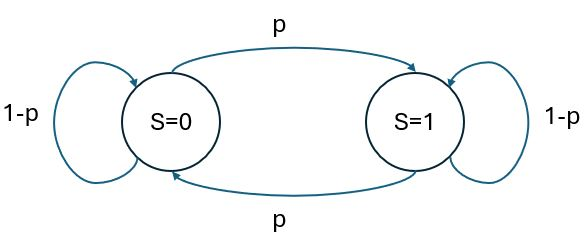

5.

In order for a Markov chain to be a stationary process $\mu_1 = \mu$.

Thus, if $q=0.5, \mu_1=\begin{bmatrix}0.5 & 0.5\end{bmatrix}=\mu$, $X^n$ will be a stationary process Markov chain.

### 4. Compressing a Markov Process
(there are 5 items in this question)
In this question you will sample a sequence from a two-states Markov source and compress this sequence in a losslessly manner using several methods. The function ``sample_Markov_path`` below samples such a sequence.

Use the transition matrix
$$
Q = \begin{bmatrix} 1-\alpha & \alpha \\
\beta & 1- \beta
\end{bmatrix}
$$
and vector of initial probabilities $\begin{bmatrix} 1, 0 \end{bmatrix}$ (namely, you begin at state $0$).


In [19]:
import numpy as np
from scipy.stats import multinomial
from matplotlib import pyplot as plt

SEED = 42

def sample_Markov_path(Q: np.ndarray, initial_probs: np.ndarray, n: int, use_seed=True)->np.ndarray:
    """
    Sample from a path from a Markov chain

    Args:
        :Q:  transition probability matrix
        :initial_probs:  vector of probabilities of the initial state
        :n:  length of sample path

    Return:
        :xx:  sample from the Markov chain of length n

    """

    M = Q.shape[0]
    xx = np.zeros((n,M))

    prob_vec = initial_probs

    for i in range(n):
        xx[i] = multinomial.rvs(p=prob_vec, n=1, random_state=SEED+i if use_seed else None)
        prob_vec = xx[i] @ Q

    return np.argmax(xx, 1)



In [20]:
def entropy(p: np.ndarray):
    return -np.log2(p) @ p

A short sample from the Markov chain (set $n = 2^{14}$ when solving the assignment):

In [21]:
alpha = 0.1
beta = 0.15

Q = np.array([
    [1-alpha, alpha],
    [beta, 1-beta]
])

initial_probs = [1, 0]  # start at state 0
X = sample_Markov_path(Q, initial_probs, n = 100)

print(X)

[0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0]


(1) What is the entropy rate of this process? is it smaller or larger than the entropy of the stationary distribution?


1. We've seen in class that the stationary distribution for this chain is:

$$\pi_s\left[\frac{\beta}{\alpha+\beta},\frac{\alpha}{\alpha+\beta}\right]$$
Making the entropy of the stationary state:
$$H\left(\pi_{s}\right)=-\frac{\beta}{\alpha+\beta}\log\frac{\beta}{\alpha+\beta}-\frac{\alpha}{\alpha+\beta}\log\frac{\alpha}{\alpha+\beta}$$

Entropy rate of the Markov chain:

$$H\left(\mathcal{X}\right)=\frac{\beta}{\alpha+\beta}H(\alpha)+\frac{\alpha}{\alpha+\beta}H(\beta)$$

In [22]:
stationary_dist = np.array([beta/ (beta+alpha), alpha / (beta+alpha)])
alpha_dist = np.array([alpha, 1-alpha])
beta_dist =  np.array([beta, 1-beta])
print(f'Entropy of the stationary distribution: {entropy(stationary_dist): 0.3f}')
entropies = np.array([entropy(alpha_dist), entropy(beta_dist)])
print(f'Entropy rate of the Markov chain: {stationary_dist @ entropies:0.3f}')

Entropy of the stationary distribution:  0.971
Entropy rate of the Markov chain: 0.525


We can see that the entropy rate is smaller than the stationary distribution entropy

(2) With $\alpha=.1$ and $\beta=.15$, generate a binary string of length $n=2^{14}$ from this Markov chain (using the function ``sample_Markov_path``). What is the fraction of times you spent at each state? Verify that this fraction matched more or less the stationary distribution.

In [23]:
n = 2**14
X = sample_Markov_path(Q, initial_probs, n = n)

In [24]:
stationary_dist = {"0":beta/ (beta+alpha), "1":alpha / (beta+alpha)}
stationary_dist

{'0': 0.6, '1': 0.4}

In [25]:
states_counts = np.unique(X, return_counts=True)[1]
print(f'Fraction of time in state 0 and 1 respectively: {(states_counts/states_counts.sum()).round(2)}')

Fraction of time in state 0 and 1 respectively: [0.58 0.42]


(3) Compress the binary string using a Huffman code for tuples of 8 symbols (one byte), i.e., consider the tensorized source with $K=8$. Estimate tuple frequencies either from the data (easier) or directly from the model. Plot the frequencies of the $2^K$ tuples. Can you anticipate the compression rate (``bits_compressed`` / ``bits_original``) without actually do the encoding?  

Answer:

Anticipate the compression rate (``bits_compressed`` / ``bits_original``) without actually do the encoding:
We use Huffman coding with the stationary distribution to create codewords and calculate the expected length per symbol.

In [26]:
k=8
probs , codewords = huffman_code_k(stationary_dist, k=k)
print(f'{calculate_expected_length(probs , codewords)/k:0.3f}')

0.974


Actual compression rate after encoding - using Huffman coding with the stationary distribution:

In [27]:
encoded_markov = encode_Huffman_k(X, codewords,k=k)
print(f'{np.vectorize(len)(encoded_markov).sum() / n:0.3f}')

0.975


Actual compression rate after encoding - using Huffman coding with the empirical symbols_and_probabilities created from the sequence itself:

In [28]:
symbols_and_probabilities = get_probabilities_from_data(X, k=k)
codewords = huffman_code(symbols_and_probabilities)
encoded_markov = encode_Huffman_k(X, codewords, k)
print(f'{np.vectorize(len)(encoded_markov).sum() / n:0.3f}')

0.581


In [29]:
lst = np.array([])
for i in range(0,len(X),k):
    k_symbols = "".join([str(x) for x in X[i:i+k]])
    lst= np.append(lst,k_symbols)


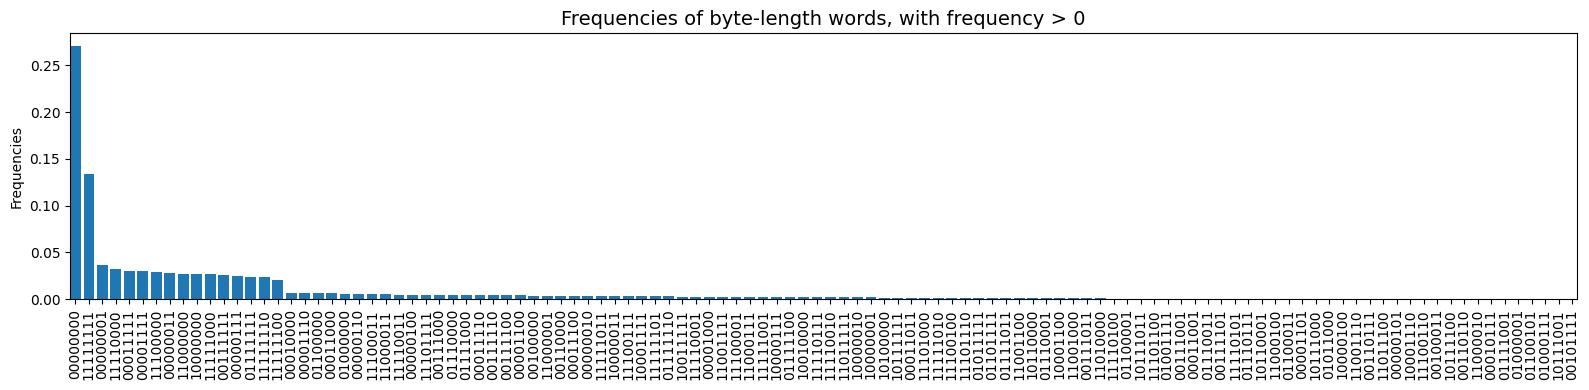

In [30]:
df = pd.DataFrame(lst, columns=["symbols"])
fig = plt.figure(figsize=(16,4))
ratios= df.symbols.value_counts(normalize=True)
plt.bar(x=ratios.index, height=ratios)
plt.xticks(rotation='vertical', fontsize = 10)
plt.title("Frequencies of byte-length words, with frequency > 0", fontsize=14)
plt.ylabel("Frequencies")
plt.margins(x=0, tight=True)
fig.tight_layout()


(4) Compress the binary string using Run Length Encoding (RLE) with a maximal stretch of $2^k$. Namely, for $k=3$, the string 000001100011111111.... is encoded as (0,4), (1,1), (0,2), (1,7)..., which is then encoded as (0,100), (1,001), (0,010), (1,111), which is then encoded as 0100 1001 0010 1111 (each stretch of "1"s or "0"s is encoded using $1+k$ bits. We subtract one from the length of the stretch because there are no stretches of length 0). Stretches longer than $2^k$ are separated into a stretch of $2^k$ and the remainder. Experiment with values of $k$ between 2-8 and report the compression rate for each $k$. Which $k$ attains the best compression rate?

In [31]:
def RLE(data, k=3):
    length = 2**k
    idx = 0
    lst = []
    while idx <= data.size-2:
        symbol = data[idx]
        counter = 0
        while (idx <= data.size-2) and (data[idx+1] == data[idx] and counter < length-1):
            counter +=1
            idx +=1
        lst.append((symbol, counter))
        idx +=1
        counter = 1

    encoded = ''
    for x, encode in lst:
        encoded += str(x) + format(encode, 'b').zfill(k)
    return encoded

In [32]:
encoded_lengths = np.array([])
for k in ks:
    encoded_lengths= np.append(encoded_lengths, len(RLE(X,k)))
compression_rates= np.array(encoded_lengths)/X.size

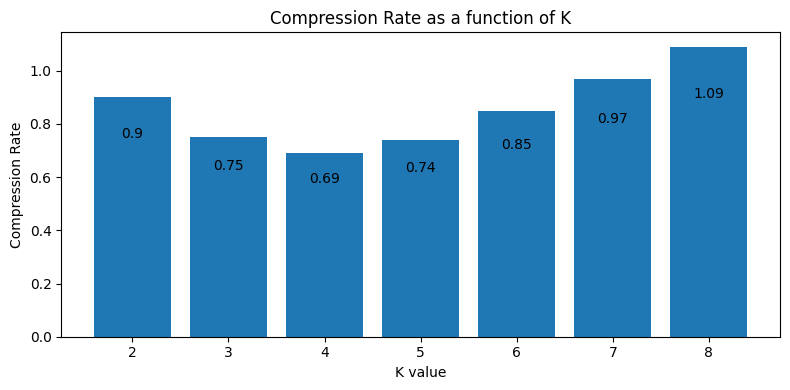

In [33]:
fig, ax = plt.subplots(1,1, figsize =(8,4))
bars = ax.bar(x=ks, height=np.round(compression_rates,2))
plt.xlabel('K value')
plt.ylabel("Compression Rate")
plt.title("Compression Rate as a function of K");
for bar in bars:
   height = bar.get_height()
   ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height*0.8), xytext=(0, 3),
   textcoords="offset points", ha='center', va='bottom')
fig.tight_layout()

(5) Bonus: Can you think about a way to improve the proposed RLE?

####Answer
Currently the algorithm is ineffective using a fixed $k=3$. As we saw $k=4$ achieved a better compression rate.

Our proposed algorithm is a pre-calculation on the sequence to choose the best $k$ to work with.

The algorithm is as follows:

Parse the given generated string, count all unique value repetitions and store the streaks' lengths in a final list. e.g  001101111 will return [2,2,1,4].

After that, take the $\log_2$ of each element in the list +1 and finally calculate its median. This median would be the choosen $k$.

Intuitively, if most of the data has streaks of 7, then the best $k$ should be $k=\log_2(7+1)=3$ like we saw in the RLE example.

In [34]:
def calculate_best_k(data):
  count_list = []
  idx = 0
  counter = 1
  while idx <= data.size-2:
      symbol = data[idx]
      if data[idx+1] == symbol:
          counter += 1
      else:
          count_list.append(counter)
          counter = 1
      idx+=1

  counts = np.array([count_list])
  counts = np.ceil(np.log2(counts))
  counts = counts.astype(np.int8) + 1
  return np.median(np.array([counts]))

As we can see, the best $k$ here was indeed 4. Let us test it in an averaged run of 200 experiments: (with different seeds)

In [37]:
n_experiments = 200
n = 2**11
success_ratio = 0
for experiment in range(n_experiments):
  X = sample_Markov_path(Q, initial_probs, n = n, use_seed=False)
  best_theoretical_k = calculate_best_k(X)
  encoded_lengths = np.array([])
  for k in ks:
    encoded_lengths= np.append(encoded_lengths, len(RLE(X,k)))
  compression_rates= np.array(encoded_lengths)/X.size
  actual_best_k = compression_rates.argmin() + 2

  success_ratio += best_theoretical_k == actual_best_k

success_ratio / n_experiments

0.995

We observe nearly 100% success rate in choosing the right $k$